KPIs Summary: {'Total Sales': 3805363, 'Total Quantity Sold': 10822, 'Total Profit': 808656, 'Average Order Size': 352.4198396825397, 'Sales Growth Rate (MoM)': 3.329738372312274, 'Return Rate': 19.45}


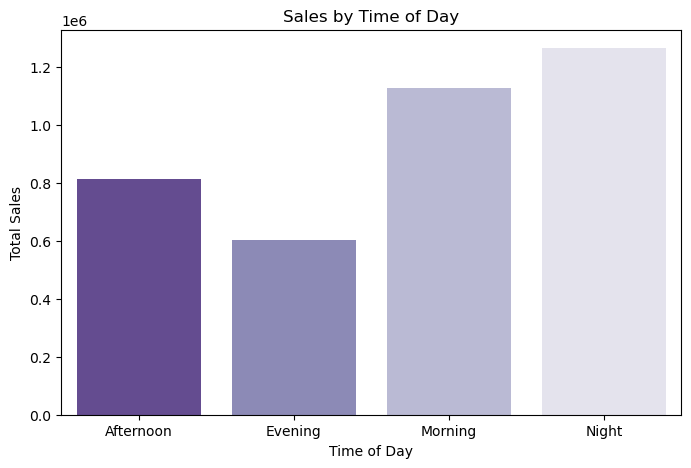

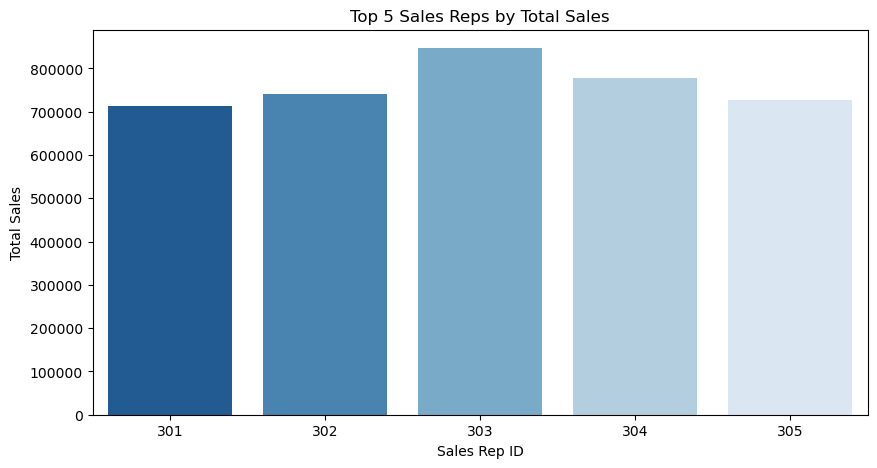

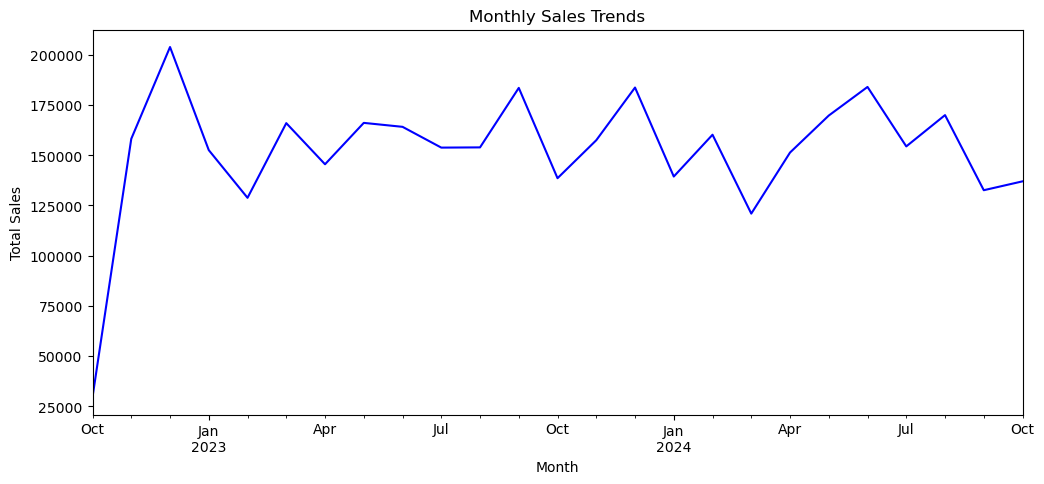

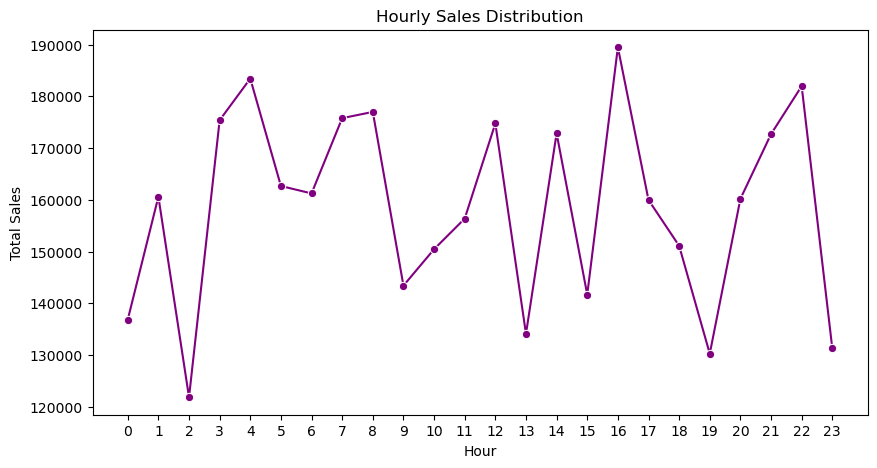

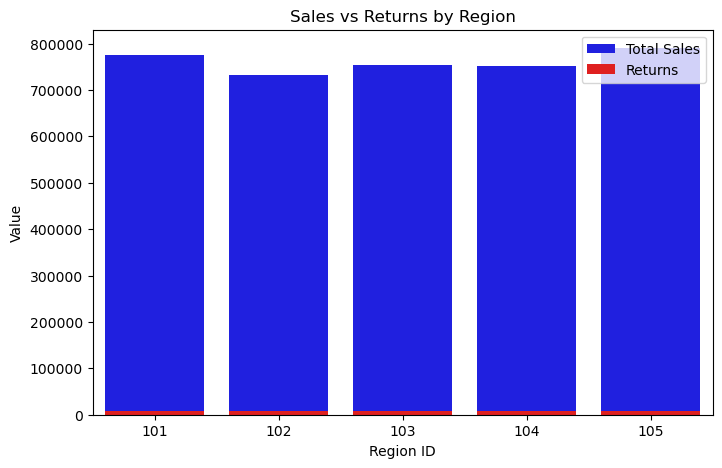

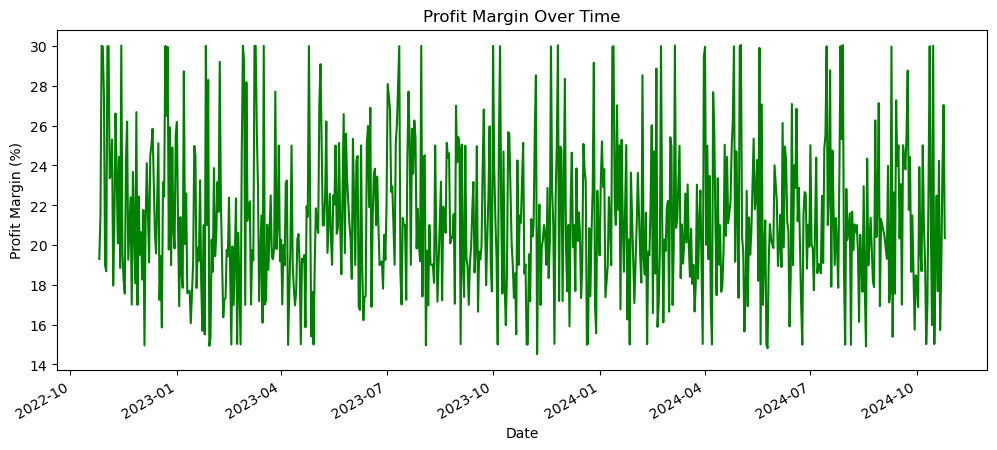

Actionable Insights:
1. Peak sales hours are in the evening, indicating a potential for targeted marketing.
2. The highest sales occur on weekends, suggesting promotions could be aligned with these days.
3. Product 202 and Region 101 contribute the most to total sales, meaning they should be prioritized in marketing strategies.
Recommendations:
1. Increase marketing efforts during peak sales hours to maximize revenue.
2. Offer discounts or bundle deals on top-performing products to further drive sales.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Data - Orders.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Sales Growth Rate Calculation
df['Month_Year'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['Total_Sales'].sum()
monthly_growth = monthly_sales.pct_change() * 100

# Average Order Size Calculation
df['Average_Order_Size'] = df['Total_Sales'] / df['Quantity_Sold']

# Return Rate Calculation
return_rate = df['Return_Flag'].mean() * 100

# Sales by Time of Day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['Time_of_Day'] = df['Hour'].apply(categorize_time)

# KPIs Summary
kpis = {
    'Total Sales': df['Total_Sales'].sum(),
    'Total Quantity Sold': df['Quantity_Sold'].sum(),
    'Total Profit': df['Profit'].sum(),
    'Average Order Size': df['Average_Order_Size'].mean(),
    'Sales Growth Rate (MoM)': monthly_growth.iloc[-1],
    'Return Rate': return_rate
}
print("KPIs Summary:", kpis)

# Top Products, Regions, and Customers
top_products = df.groupby('Product_ID')['Total_Sales'].sum().nlargest(2)
top_regions = df.groupby('Region_ID')['Total_Sales'].sum().nlargest(2)
top_customers = df.groupby('Sales_Rep_ID')['Total_Sales'].sum().nlargest(2)

# Sales by Time of Day
time_sales = df.groupby('Time_of_Day')['Total_Sales'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=time_sales.index, y=time_sales.values, palette='Purples_r')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()

# Sales Rep Performance
sales_rep_performance = df.groupby('Sales_Rep_ID').agg({'Total_Sales': 'sum', 'Quantity_Sold': 'sum'}).sort_values(by='Total_Sales', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_rep_performance.index[:5], y=sales_rep_performance['Total_Sales'][:5], palette='Blues_r')
plt.title('Top 5 Sales Reps by Total Sales')
plt.xlabel('Sales Rep ID')
plt.ylabel('Total Sales')
plt.show()

# Monthly and Yearly Sales Trends
plt.figure(figsize=(12, 5))
monthly_sales.plot(title='Monthly Sales Trends', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Hourly Sales Distribution
hourly_sales = df.groupby('Hour')['Total_Sales'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='purple')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.show()

# Sales vs Returns
sales_returns = df.groupby('Region_ID').agg({'Total_Sales': 'sum', 'Return_Flag': 'sum'})
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_returns.index, y=sales_returns['Total_Sales'], color='blue', label='Total Sales')
sns.barplot(x=sales_returns.index, y=sales_returns['Return_Flag'] * 100, color='red', label='Returns')
plt.title('Sales vs Returns by Region')
plt.xlabel('Region ID')
plt.ylabel('Value')
plt.legend()
plt.show()

# Profit Margin Analysis
profit_margin = (df.groupby('Order_Date')['Profit'].sum() / df.groupby('Order_Date')['Total_Sales'].sum()) * 100
plt.figure(figsize=(12, 5))
profit_margin.plot(title='Profit Margin Over Time', color='green')
plt.xlabel('Date')
plt.ylabel('Profit Margin (%)')
plt.show()

# Actionable Insights
print("Actionable Insights:")
print("1. Peak sales hours are in the evening, indicating a potential for targeted marketing.")
print("2. The highest sales occur on weekends, suggesting promotions could be aligned with these days.")
print("3. Product 202 and Region 101 contribute the most to total sales, meaning they should be prioritized in marketing strategies.")

# Recommendations
print("Recommendations:")
print("1. Increase marketing efforts during peak sales hours to maximize revenue.")
print("2. Offer discounts or bundle deals on top-performing products to further drive sales.")
